In [1]:
#### Importing the libraries ----
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from math import sqrt

In [2]:
pip install fsspec

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
data = pd.read_excel(r'C:\Users\Pc\OneDrive\Pictures\Data science assignments\week 13\b88assignments\Project - 3&4_Multiple_Reg\Project - 3&4_Multiple_Reg\Toyotacorolla_1.xlsx')

In [4]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
df = data.copy()
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## EDA and Data Visualisation

In [6]:
# Printing the summary of the DataFrame's structure and content.
print("Summary of the DataFrame's structure and content-------")
df.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quar

In [7]:
df.shape

(1436, 38)

In [8]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [9]:
# Checking for duplicates
df[df.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [32]:
df1 = df[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df1.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [33]:
df1.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [34]:
df1.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [35]:
print("The skewness of the dataset is as follows - ")
print(df1.skew())

The skewness of the dataset is as follows - 
Age_08_04        -0.826702
KM                1.015912
HP                0.955836
cc               27.431793
Doors            -0.076395
Gears             2.283960
Quarterly_Tax     1.993834
Weight            3.108639
dtype: float64


In [13]:
## checking if there is any null value in the dataset
df.isnull().sum()
## Inference - The data is more of clean or srted as there are no null value or duplicates.

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [14]:
print("Descriptive statistics of the Price Column - ")
round(df['Price'].describe(),2)

Descriptive statistics of the Price Column - 


count     1436.00
mean     10730.82
std       3626.96
min       4350.00
25%       8450.00
50%       9900.00
75%      11950.00
max      32500.00
Name: Price, dtype: float64

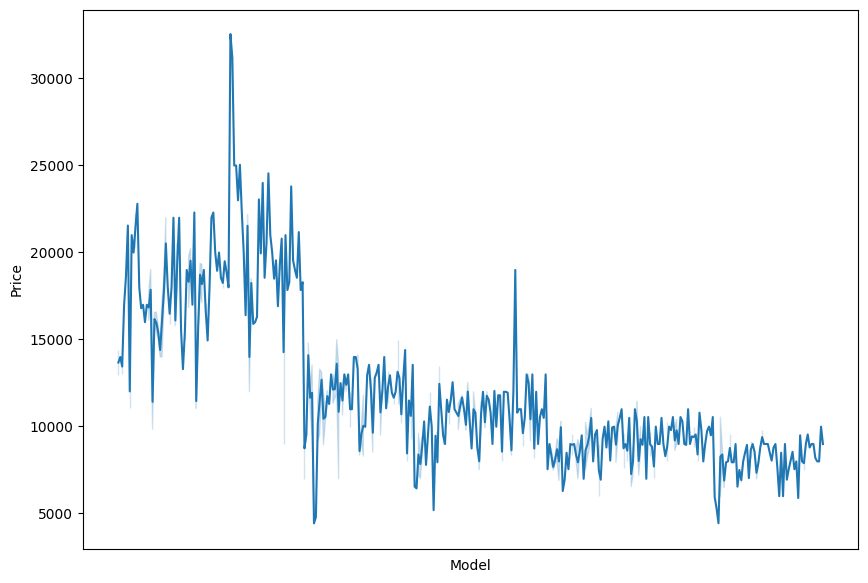

In [15]:
plt.figure(figsize=(10,7))
sns.lineplot(x = 'Model', y = 'Price', data = df)
# plt.xlabel('')  # Remove x-label
# plt.ylabel('')
# Remove x and y ticks
plt.xticks([])  # Remove x ticks
plt.savefig("line plot between model and price.png")
plt.show()

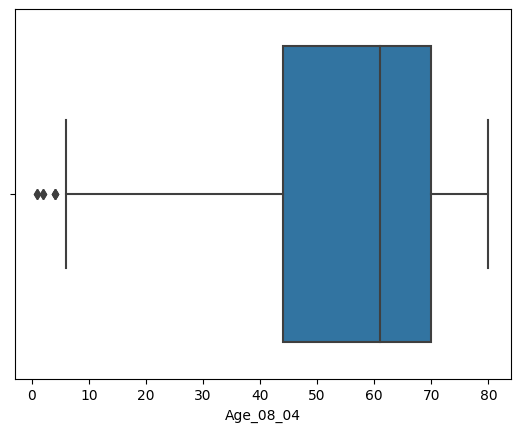

In [16]:
sns.boxplot(x = df['Age_08_04'])
plt.savefig("Boxplot of Age.png")
plt.show()

## Model Building

In [17]:
##### Sampling the data  --- 
from sklearn.model_selection import train_test_split

In [36]:
X = df[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
X.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [37]:
y = df['Price']
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.80,random_state=1234)

In [39]:
model = LinearRegression()

In [40]:
model_train = model.fit(X_train,y_train)

In [41]:
pred1 = model_train.predict(X_test)
pred1

array([ 9472.92170344, 11552.12656288, 17522.45869898, 26225.31290605,
        5510.56486921, 12624.75139588,  7867.68870378, 13414.35875301,
       13163.77318866,  7773.72165653, 10130.3007956 ,  8183.69814186,
        6325.07632398,  7088.06860045,  8866.6049679 ,  7427.7668917 ,
        7743.22733879,  6700.70366221, 13120.58663606, 11404.12381446,
        8636.00356751,  7439.21237856, 20611.30337548,  8286.13035501,
       13025.01818061, 12455.32295655,  9046.6756224 , 10219.1108664 ,
       13182.07779324,  6692.77174835,  9211.64425003,  9773.14364805,
        7659.34842924,  9961.51385625,  4808.58068714, 11066.07307091,
        9349.72133689,  8345.5116007 ,  8251.41537178,  6747.89215529,
       17385.49723003, 15720.28186812, 10621.24052136,  7851.16798901,
        7359.171505  ,  7282.05235378,  9261.92745048, 15971.47770998,
       10667.32270983,  9608.35394144,  9138.73286014,  7644.46193891,
       12273.13252491,  6977.22244381,  7928.64268331, 10234.06501247,
      

In [42]:
dd  = pd.DataFrame(pred1, columns = ['Predicted'])

In [43]:
dd['Actual'] = y_test.values

In [44]:
round(sqrt(mean_squared_error(dd['Actual'], dd['Predicted'])))

1344

In [45]:
print("The Strength of the Model is - ",round(r2_score(dd['Actual'], dd['Predicted']), 2))  #### # Strendth of the Model

The Strength of the Model is -  0.87


## Saving the model ---

In [46]:
import joblib

In [48]:
filename = 'joblib_toyotacorolla_reg_model.sav'
joblib.dump(model_train,filename)

['joblib_toyotacorolla_reg_model.sav']